<a href="https://colab.research.google.com/github/ayush2281/Pytorch-for-ML-DL-/blob/main/07_Milestone_Project_1_PyTorch_Experiment_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#07 Milestone Project 1: PyTorch Experiment Tracking

**Note**: This notebook uses torchvision's new multi-weight support API (available in torchvision v0.13+)[new multi-weight support API (available in torchvision v0.13+)](https://pytorch.org/blog/introducing-torchvision-new-multi-weight-support-api/).

We've trained a fair few models now on the journey to making FoodVision Mini (an image classification model to classify images of pizza, steak or sushi).

And so far we've kept track of them via Python dictionaries.

Or just comparing them by the metric print outs during training.

What if you wanted to run a dozen (or more) different models at once?

Surely there's a better way...

There is.

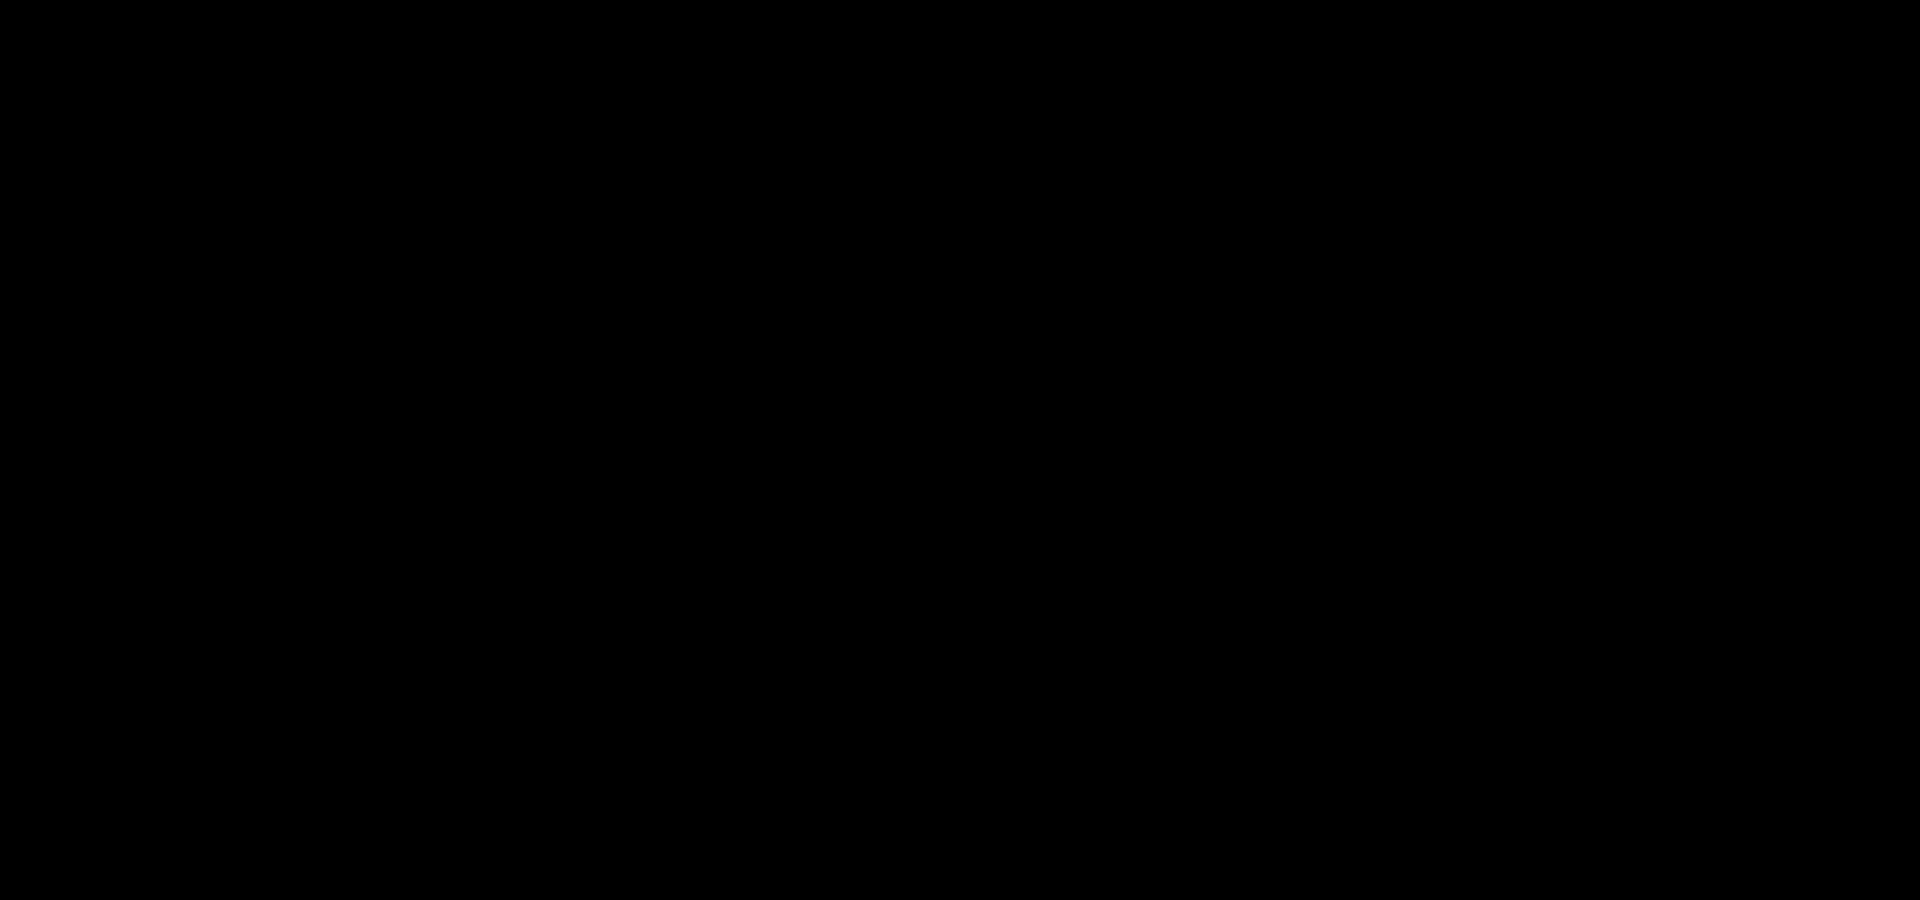

#**Experiment tracking**.

And since experiment tracking is so important and integral to machine learning, you can consider this notebook your first milestone project.

So welcome to Milestone Project 1: FoodVision Mini Experiment Tracking.

We're going to answer the question: **how do I track my machine learning experiments?**

#What is experiment tracking?
Machine learning and deep learning are very experimental.

You have to put on your artist's beret/chef's hat to cook up lots of different models.

And you have to put on your scientist's coat to track the results of various combinations of data, model architectures and training regimes.

That's where **experiment tracking** comes in.

If you're running lots of different **experiments, experiment tracking helps you figure out what works and what doesn't.**


#Why track experiments?
If you're only running a handful of models (like we've done so far), it might be okay just to track their results in print outs and a few dictionaries.

However, as the number of experiments you run starts to increase, this naive way of tracking could get out of hand.

So if you're following the machine learning practitioner's motto of experiment, experiment, experiment!, you'll want a way to track them.

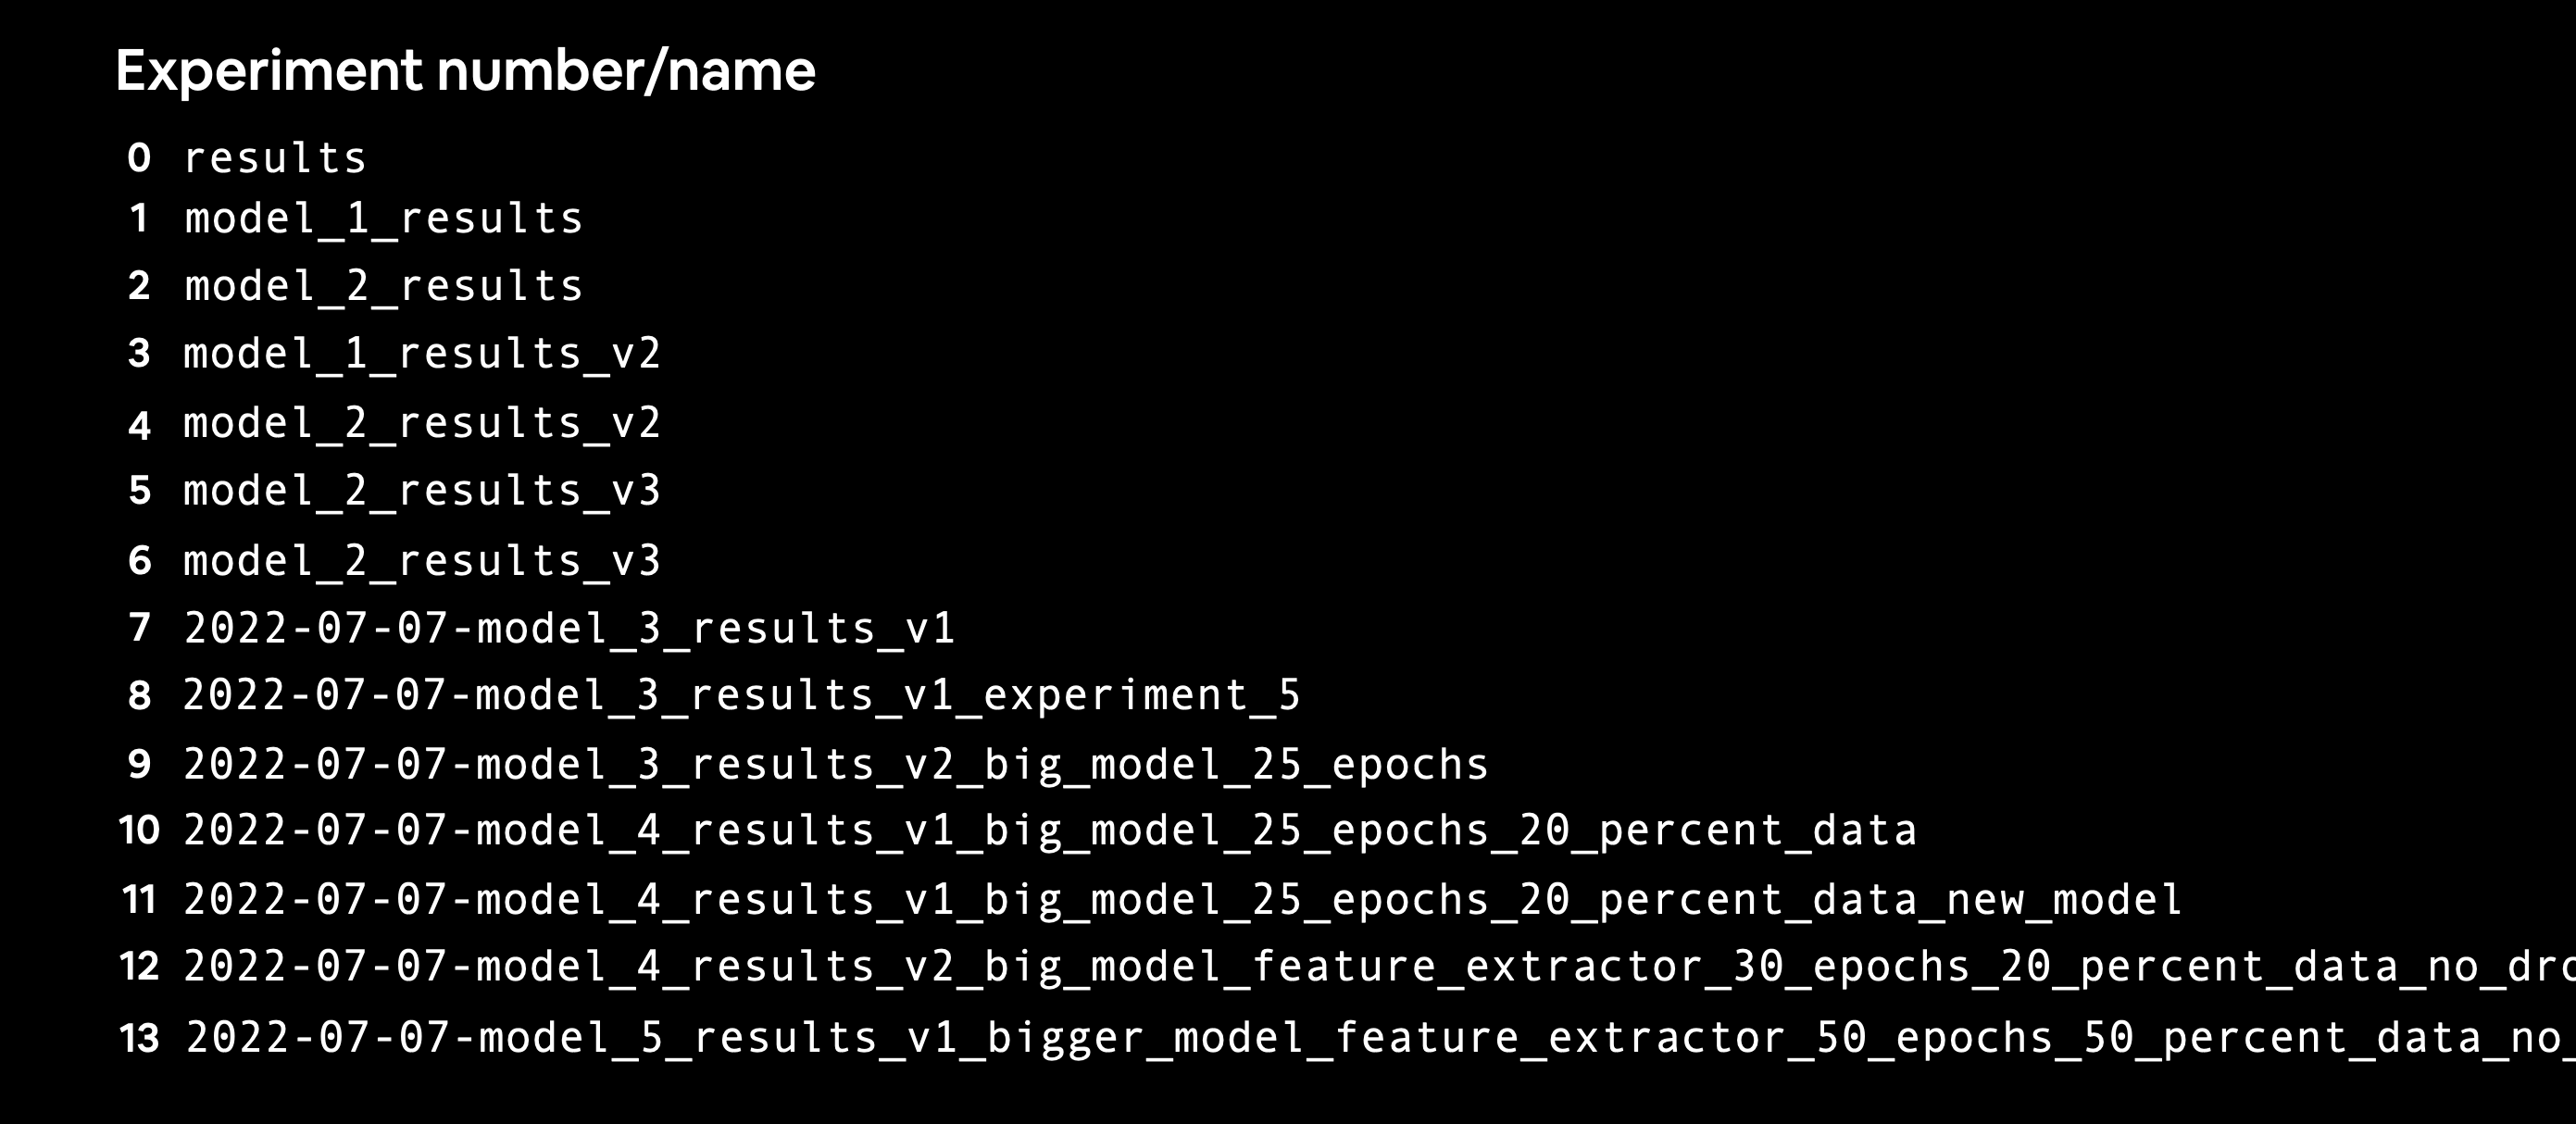

After building a few models and tracking their results, you'll start to notice how quickly it can get out of hand.

#Different ways to track machine learning experiments
There are as many different ways to track machine learning experiments as there are experiments to run.

This table covers a few.

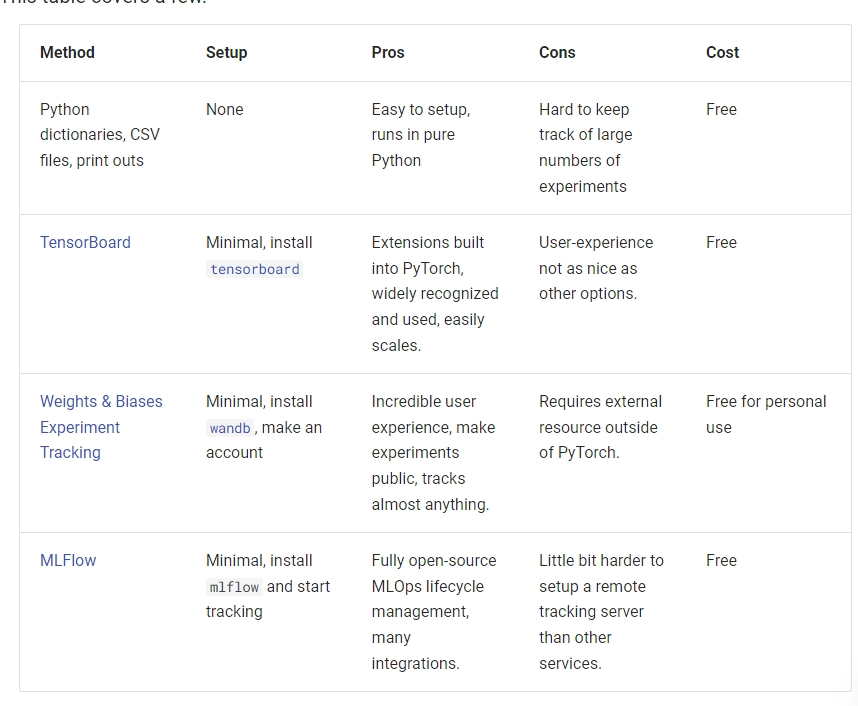

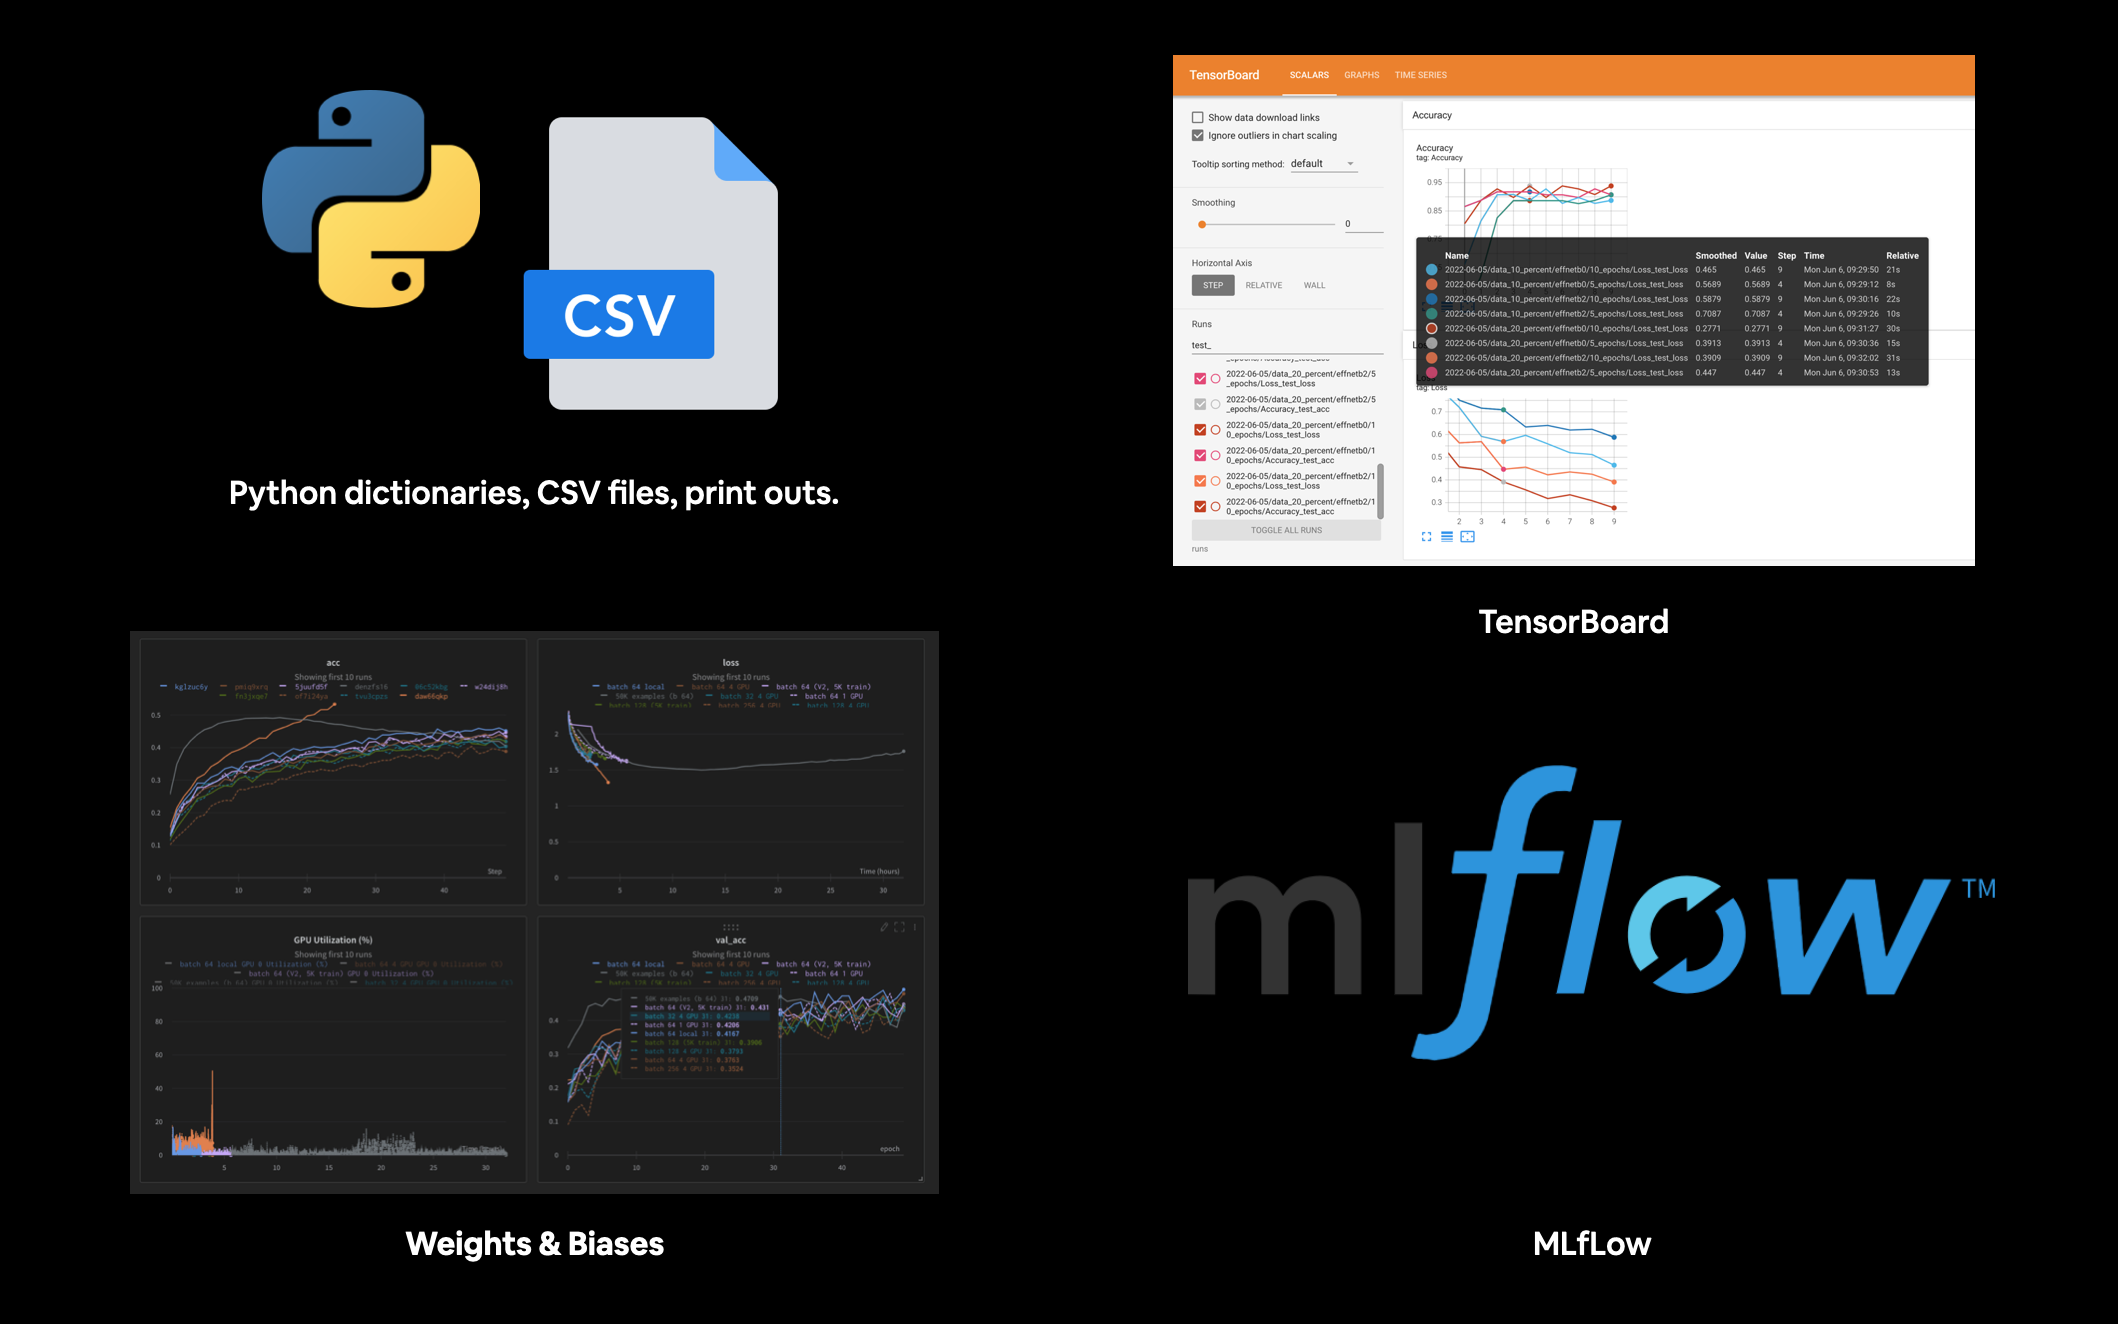


#What we're going to cover
We're going to be running several different modelling experiments with various levels of data, model size and training time to try and improve on FoodVision Mini.

And due to its tight integration with PyTorch and widespread use, this notebook focuses on using TensorBoard to track our experiments.

However, the principles we're going to cover are similar across all of the other tools for experiment tracking.

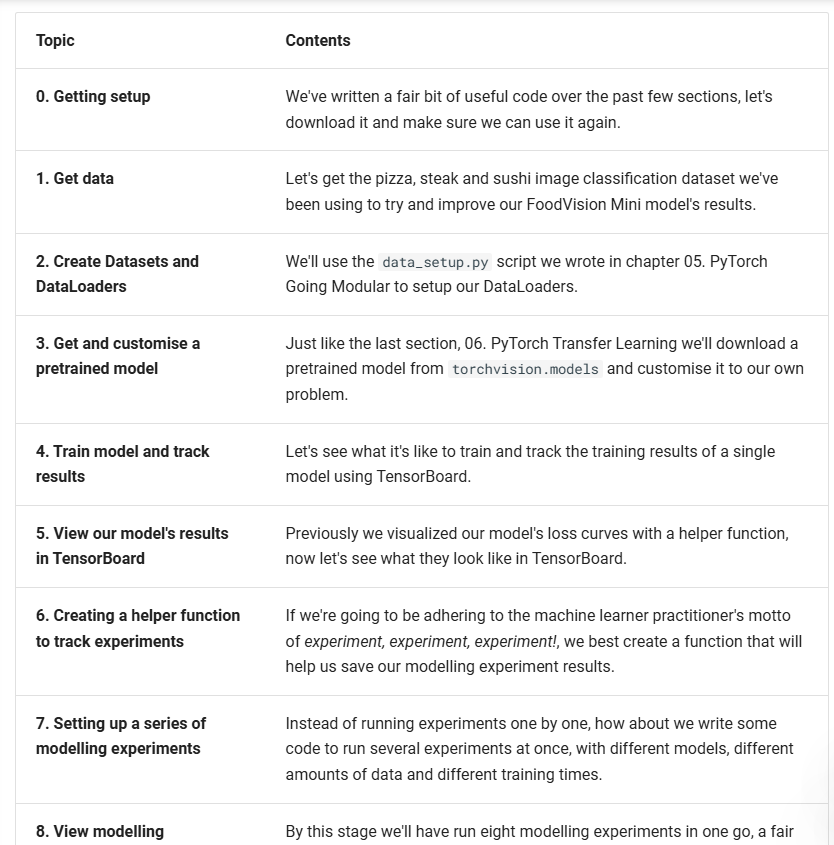

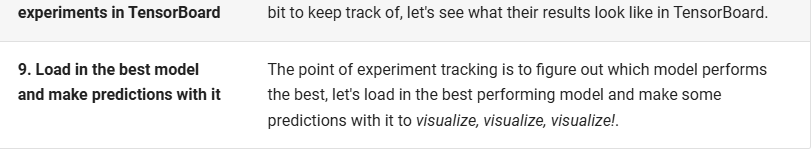


#0. Getting setup
Let's start by downloading all of the modules we'll need for this section.

To save us writing extra code, we're going to be leveraging some of the Python scripts (such as data_setup.py and engine.py) we created in section, `05. PyTorch Going Modular.`

Specifically, we're going to download the `going_modular` directory from the `pytorch-deep-learning` repository (if we don't already have it).

We'll also get the `torchinfo` package if it's not available.

`torchinfo` will help later on to give us visual summaries of our model(s).

And since we're using a newer version of the `torchvision` package (v0.13 as of June 2022), we'll make sure we've got the latest versions.

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+4
try:
  import torch
  import torchvision
  assert int(torch.__vision__.split(".")[1]) >=12, "torch version should be 1.12+"
  assert int(torchvision.__version__.split(".")[1]) >=13, "torchvision version should be 0.13"
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")
except:
  print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
  !pip install -U torchvision torchaudio --extra-index-url https://download.pytorch.org.whl/cu113
  import torch
  import torchvision
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org.whl/cu113
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 803.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

torch version: 2.5.0+cu121
torchvision version: 0.20.0+cu121


Note: If you're using Google Colab, you may have to restart your runtime after running the above cell. After restarting, you can run the cell again and verify you've got the right versions of torch (0.12+) and torchvision (0.13+).

In [2]:
# continue with the regular import (dependencies)
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# try to gte the torchinfo, install it if it does'nt work

try:
  from torchinfo import summary
except:
  print("[INFO] Couldn't find torchinfo... installing it.")
  !pip install -q torchinfo
  from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.



Now let's setup device agnostic code.

**Note**: If you're using Google Colab, and you don't have a GPU turned on yet, it's now time to turn one on via Runtime -> `Change runtime type -> Hardware accelerator -> GPU`.

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

**Create a helper function to set seeds**
Since we've been setting random seeds a whole bunch throughout previous sections, how about we functionize it?

Let's create a function to "set the seeds" called set_seeds().

**Note**: Recalling a random seed is a way of flavouring the randomness generated by a computer. They aren't necessary to always set when running machine learning code, however, they help ensure there's an element of reproducibility (the numbers I get with my code are similar to the numbers you get with your code). Outside of an educational or experimental setting, random seeds generally aren't required.

In [4]:
# set seed
def set_seeds(seed: int:42):
  """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
     # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)



SyntaxError: invalid syntax (<ipython-input-4-60cd059455aa>, line 2)

#1. Get data
As always, before we can run machine learning experiments, we'll need a dataset.

We're going to continue trying to improve upon the results we've been getting on FoodVision Mini.

In the previous section, `06. PyTorch Transfer Learning`, we saw how powerful using a pretrained model and transfer learning could be when classifying images of pizza, steak and sushi.

So how about we run some experiments and try to further improve our results?

To do so, we'll use similar code to the previous section to download the `pizza_steak_sushi.zip` (if the data doesn't already exist) except this time it's been functionalised.

This will allow us to use it again later.

In [ ]:
import os   #oprating system for the directory , file path and file location
import zipfile # for download data in form of zipfile

from  pathlib import Path
import requests

def download_data(source: str,
                  destination: str,
                  remove_source: bool =True) -> Path:
      """Downloads a zipped dataset from source and unzips to destination.

    Args:
        source (str): A link to a zipped file containing data.
        destination (str): A target directory to unzip data to.
        remove_source (bool): Whether to remove the source after downloading and extracting.

    Returns:
        pathlib.Path to downloaded data.

    Example usage:
        download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                      destination="pizza_steak_sushi")
    """
    # setup path to datafolder
    data_path = Path("data/")
    image_path = data_path / destination

    # if the image foldeer does'nt exist downalod it prepare it...
    if image_path.is_dir():
      print(f"[INFO] {image_path} directory exist, skipping dowmloading...")
    else:
      print(f"[INFO] did not find{image_path} directory creating  one..")
      image_path.mkdir(parents=True, exist_ok = True)


      # dowmload pizza
      target_file = Path(source).name
      with open(data_path / target_file, "wb") as f:
        request = requests.get(source)
        print(f"[INFO] Downloading {taget_file} from {source}...")
        f.write(request.content)

        # Unzipp pizza , steak, susho data
        with zipfile.ZipFiile(data_path / target_file, "r") as zip_ref:
          print(f"[INFO] Unzipping {target_file} data.....")
          zip_ref.extractall(image_path)

        # Remove .zip  file
        if remove_source:
          os.remove(data_path / taget_file)

return image_path

image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path





###2. Create Datasets and DataLoaders
Now we've got some data, let's turn it into PyTorch DataLoaders.

We can do so using the create_dataloaders() function we created in 05. PyTorch Going Modular part 2.

And since we'll be using transfer learning and specifically pretrained models from torchvision.models, we'll create a transform to prepare our images correctly.

To transform our images into tensors, we can use:

Manually created transforms using torchvision.transforms.
Automatically created transforms using torchvision.models.MODEL_NAME.MODEL_WEIGHTS.DEFAULT.transforms().
Where MODEL_NAME is a specific torchvision.models architecture, MODEL_WEIGHTS is a specific set of pretrained weights and DEFAULT means the "best available weights".
We saw an example of each of these in 06. PyTorch Transfer Learning section 2.

Let's see first an example of manually creating a torchvision.transforms pipeline (creating a transforms pipeline this way gives the most customization but can potentially result in performance degradation if the transforms don't match the pretrained model).

The main manual transformation we need to be sure of is that all of our images are normalized in ImageNet format (this is because pretrained torchvision.models are all pretrained on ImageNet).